# Data Description

**Independent variables**

1. age : age of policyholder
2. sex: gender of policy holder (female=0, male=1)
3. bmi: Body mass index, ideally 18.5 to 25
4. children: number of children / dependents of policyholder
5. smoker: smoking state of policyholder (non-smoke=0;smoker=1) 
6. region: the residential area of policyholder in the US (northeast=0, northwest=1, southeast=2, southwest=3)
7. charges: individual medical costs billed by health insurance

**Target variable**

1. insuranceclaim - categorical variable (0,1)

**Tasks**
- Create a logistic regression model and comment on the independwnt variables' affect on the dependent variable 


In [ ]:
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')


In [ ]:
from google.colab import files
files.upload()

Saving insurance2.csv to insurance2.csv


{'insurance2.csv': b'age,sex,bmi,children,smoker,region,charges,insuranceclaim\n19,0,27.9,0,1,3,16884.924,1\n18,1,33.77,1,0,2,1725.5523,1\n28,1,33,3,0,2,4449.462,0\n33,1,22.705,0,0,1,21984.47061,0\n32,1,28.88,0,0,1,3866.8552,1\n31,0,25.74,0,0,2,3756.6216,0\n46,0,33.44,1,0,2,8240.5896,1\n37,0,27.74,3,0,1,7281.5056,0\n37,1,29.83,2,0,0,6406.4107,0\n60,0,25.84,0,0,1,28923.13692,0\n25,1,26.22,0,0,0,2721.3208,1\n62,0,26.29,0,1,2,27808.7251,1\n23,1,34.4,0,0,3,1826.843,1\n56,0,39.82,0,0,2,11090.7178,1\n27,1,42.13,0,1,2,39611.7577,1\n19,1,24.6,1,0,3,1837.237,0\n52,0,30.78,1,0,0,10797.3362,1\n23,1,23.845,0,0,0,2395.17155,0\n56,1,40.3,0,0,3,10602.385,1\n30,1,35.3,0,1,3,36837.467,1\n60,0,36.005,0,0,0,13228.84695,1\n30,0,32.4,1,0,3,4149.736,1\n18,1,34.1,0,0,2,1137.011,1\n34,0,31.92,1,1,0,37701.8768,1\n37,1,28.025,2,0,1,6203.90175,0\n59,0,27.72,3,0,2,14001.1338,1\n63,0,23.085,0,0,0,14451.83515,0\n55,0,32.775,2,0,1,12268.63225,0\n23,1,17.385,1,0,1,2775.19215,1\n31,1,36.3,2,1,3,38711,1\n22,1,35.6,0,1,

In [ ]:
insuranceDF = pd.read_csv('insurance2.csv')
print(insuranceDF.head())

   age  sex     bmi  children  smoker  region      charges  insuranceclaim
0   19    0  27.900         0       1       3  16884.92400               1
1   18    1  33.770         1       0       2   1725.55230               1
2   28    1  33.000         3       0       2   4449.46200               0
3   33    1  22.705         0       0       1  21984.47061               0
4   32    1  28.880         0       0       1   3866.85520               1


In [ ]:
# values count in insuranceclaim
insuranceDF.insuranceclaim.value_counts()

1    783
0    555
Name: insuranceclaim, dtype: int64

In [ ]:
X=pd.DataFrame()
X['age']=insuranceDF['age']
X['sex']=insuranceDF['sex']
X['bmi']=insuranceDF['bmi']
X['children']=insuranceDF['children']
X['smoker']=insuranceDF['smoker']
X['region']=insuranceDF['region']
X['charges']=insuranceDF['charges']

In [ ]:
X.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


In [ ]:
y=insuranceDF['insuranceclaim']
y[:5]

0    1
1    1
2    0
3    0
4    1
Name: insuranceclaim, dtype: int64

In [ ]:
insuranceDF.isnull().sum()

age               0
sex               0
bmi               0
children          0
smoker            0
region            0
charges           0
insuranceclaim    0
dtype: int64

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
display (X[:5])
X.age = scaler.fit_transform(X[['age']]) # x is column then (x- mean(x))/sd(x)
display (X[:5])

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


,age,sex,bmi,children,smoker,region,charges
0,-1.438764,0,27.900,0,1,3,16884.92400
1,-1.509965,1,33.770,1,0,2,1725.55230
2,-0.797954,1,33.000,3,0,2,4449.46200
3,-0.441948,1,22.705,0,0,1,21984.47061
4,-0.513149,1,28.880,0,0,1,3866.85520


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f2e60687780>]],
      dtype=object)

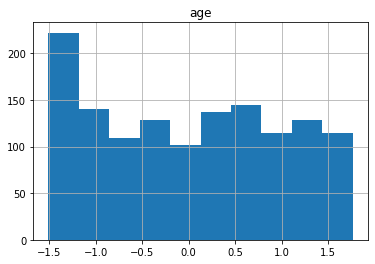

In [ ]:
X.hist('age')

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [ ]:
print (X_train.shape)
print (X_test.shape)
print (y_train.shape)
print (y_test.shape)

(1070, 7)
(268, 7)
(1070,)
(268,)


In [ ]:
from sklearn.linear_model import LogisticRegression

# fit the model to the training data
model = LogisticRegression()
model.fit(X_train, y_train)

print (model.intercept_)
print ()
print (model.coef_)
print ()
print (X_train.columns)

[-0.13964489]

[[ 6.79238589e-02 -5.09975301e-02  3.88834030e-02 -1.19291925e+00
   9.46116406e-02 -1.29698151e-01  8.15657512e-05]]

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')


In [ ]:
Log_odds(insurance claim)


log_odds=-0.13964489 + 6.79238589e-02age -5.09975301e-02sex + 3.88834030e-02bmi -1.19291925e+00children +9.46116406e-02smoker -1.29698151e-01region  +8.15657512e-05charges

In [ ]:
display (X_test[:10])
print ()
display (model.predict_proba(X_test)[:10]) # prob
print ()
display (model.predict(X_test)[:10]) # classification

,age,sex,bmi,children,smoker,region,charges
764,0.412467,0,25.175,2,0,0,9095.06825
887,-0.228344,0,30.020,0,0,1,5272.17580
890,1.765289,0,26.885,0,1,1,29330.98315
1293,0.483668,1,25.745,3,0,1,9301.89355
259,-1.438764,1,31.920,0,1,1,33750.29180
1312,-0.370746,1,42.900,1,0,3,4536.25900
899,-1.438764,0,22.515,0,0,1,2117.33885
752,1.765289,1,37.905,0,0,1,14210.53595
1286,-0.797954,0,17.290,0,0,0,3732.62510
707,0.697271,1,28.690,3,0,1,10264.44210


array([[0.68497521, 0.31502479],
       [0.21207621, 0.78792379],
       [0.03283234, 0.96716766],
       [0.89153108, 0.10846892],
       [0.02482972, 0.97517028],
       [0.44022161, 0.55977839],
       [0.33601747, 0.66398253],
       [0.08072529, 0.91927471],
       [0.31369447, 0.68630553],
       [0.8697721 , 0.1302279 ]])

array([0, 1, 1, 0, 1, 1, 1, 1, 1, 0])

In [ ]:
# compute the accuracy of our predictions
from sklearn.metrics import accuracy_score
print ("Logistic testing accuracy is %2.2f" % accuracy_score(y_test,model.predict(X_test)))

Logistic testing accuracy is 0.79
